# New Section


```
testing data
{
"r1":20, // data range from 1 to 30
"r2":50, // data range from 40 to 70
"r3":80, // data range from 80 to 130
"r4":140, // data range from 150 to 230
"r5":240, // data range from 240 to 290
"r6": 300, // data range from 300 to 360
}
```



In [43]:
import pandas as pd
import numpy as np
import random

In [44]:
raw_data=pd.DataFrame()
raw_data['r1']=np.linspace(1,30,1000)
raw_data['r2']=np.linspace(31,70,1000)
raw_data['r3']=np.linspace(71,130,1000)
raw_data['r4']=np.linspace(131,230,1000)
raw_data['r5']=np.linspace(231,290,1000)
raw_data['r6']=np.linspace(291,360,1000)
print(raw_data)

            r1         r2          r3          r4          r5          r6
0     1.000000  31.000000   71.000000  131.000000  231.000000  291.000000
1     1.029029  31.039039   71.059059  131.099099  231.059059  291.069069
2     1.058058  31.078078   71.118118  131.198198  231.118118  291.138138
3     1.087087  31.117117   71.177177  131.297297  231.177177  291.207207
4     1.116116  31.156156   71.236236  131.396396  231.236236  291.276276
..         ...        ...         ...         ...         ...         ...
995  29.883884  69.843844  129.763764  229.603604  289.763764  359.723724
996  29.912913  69.882883  129.822823  229.702703  289.822823  359.792793
997  29.941942  69.921922  129.881882  229.801802  289.881882  359.861862
998  29.970971  69.960961  129.940941  229.900901  289.940941  359.930931
999  30.000000  70.000000  130.000000  230.000000  290.000000  360.000000

[1000 rows x 6 columns]


In [45]:
categories=['Unripe','Early Ripe','Over Ripe','Partially Ripe']
classes=[]

for _ in range(len(raw_data)):
  temp=np.random.choice(categories,1)
  classes.append(temp[0])
raw_data['Class']=classes

In [46]:
raw_data.head()

,r1,r2,r3,r4,r5,r6,Class
0,1.000000,31.000000,71.000000,131.000000,231.000000,291.000000,Unripe
1,1.029029,31.039039,71.059059,131.099099,231.059059,291.069069,Partially Ripe
2,1.058058,31.078078,71.118118,131.198198,231.118118,291.138138,Over Ripe
3,1.087087,31.117117,71.177177,131.297297,231.177177,291.207207,Early Ripe
4,1.116116,31.156156,71.236236,131.396396,231.236236,291.276276,Over Ripe


# Standardizing Data

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
X_columns=['r1', 'r2', 'r3', 'r4', 'r5', 'r6']
X=raw_data[X_columns]
scaler = StandardScaler()
scaler.fit(X)
X
# raw_data.columns

,r1,r2,r3,r4,r5,r6
0,1.000000,31.000000,71.000000,131.000000,231.000000,291.000000
1,1.029029,31.039039,71.059059,131.099099,231.059059,291.069069
2,1.058058,31.078078,71.118118,131.198198,231.118118,291.138138
3,1.087087,31.117117,71.177177,131.297297,231.177177,291.207207
4,1.116116,31.156156,71.236236,131.396396,231.236236,291.276276
...,...,...,...,...,...,...
995,29.883884,69.843844,129.763764,229.603604,289.763764,359.723724
996,29.912913,69.882883,129.822823,229.702703,289.822823,359.792793
997,29.941942,69.921922,129.881882,229.801802,289.881882,359.861862
998,29.970971,69.960961,129.940941,229.900901,289.940941,359.930931


In [49]:
scaled_features = scaler.transform(X)

In [50]:
scaled_features


array([[-1.73031962, -1.73031962, -1.73031962, -1.73031962, -1.73031962,
        -1.73031962],
       [-1.72685552, -1.72685552, -1.72685552, -1.72685552, -1.72685552,
        -1.72685552],
       [-1.72339142, -1.72339142, -1.72339142, -1.72339142, -1.72339142,
        -1.72339142],
       ...,
       [ 1.72339142,  1.72339142,  1.72339142,  1.72339142,  1.72339142,
         1.72339142],
       [ 1.72685552,  1.72685552,  1.72685552,  1.72685552,  1.72685552,
         1.72685552],
       [ 1.73031962,  1.73031962,  1.73031962,  1.73031962,  1.73031962,
         1.73031962]])

In [51]:
df_feat = pd.DataFrame(scaled_features,columns=X_columns)
df_feat.head()

,r1,r2,r3,r4,r5,r6
0,-1.730320,-1.730320,-1.730320,-1.730320,-1.730320,-1.730320
1,-1.726856,-1.726856,-1.726856,-1.726856,-1.726856,-1.726856
2,-1.723391,-1.723391,-1.723391,-1.723391,-1.723391,-1.723391
3,-1.719927,-1.719927,-1.719927,-1.719927,-1.719927,-1.719927
4,-1.716463,-1.716463,-1.716463,-1.716463,-1.716463,-1.716463


Pair Plot

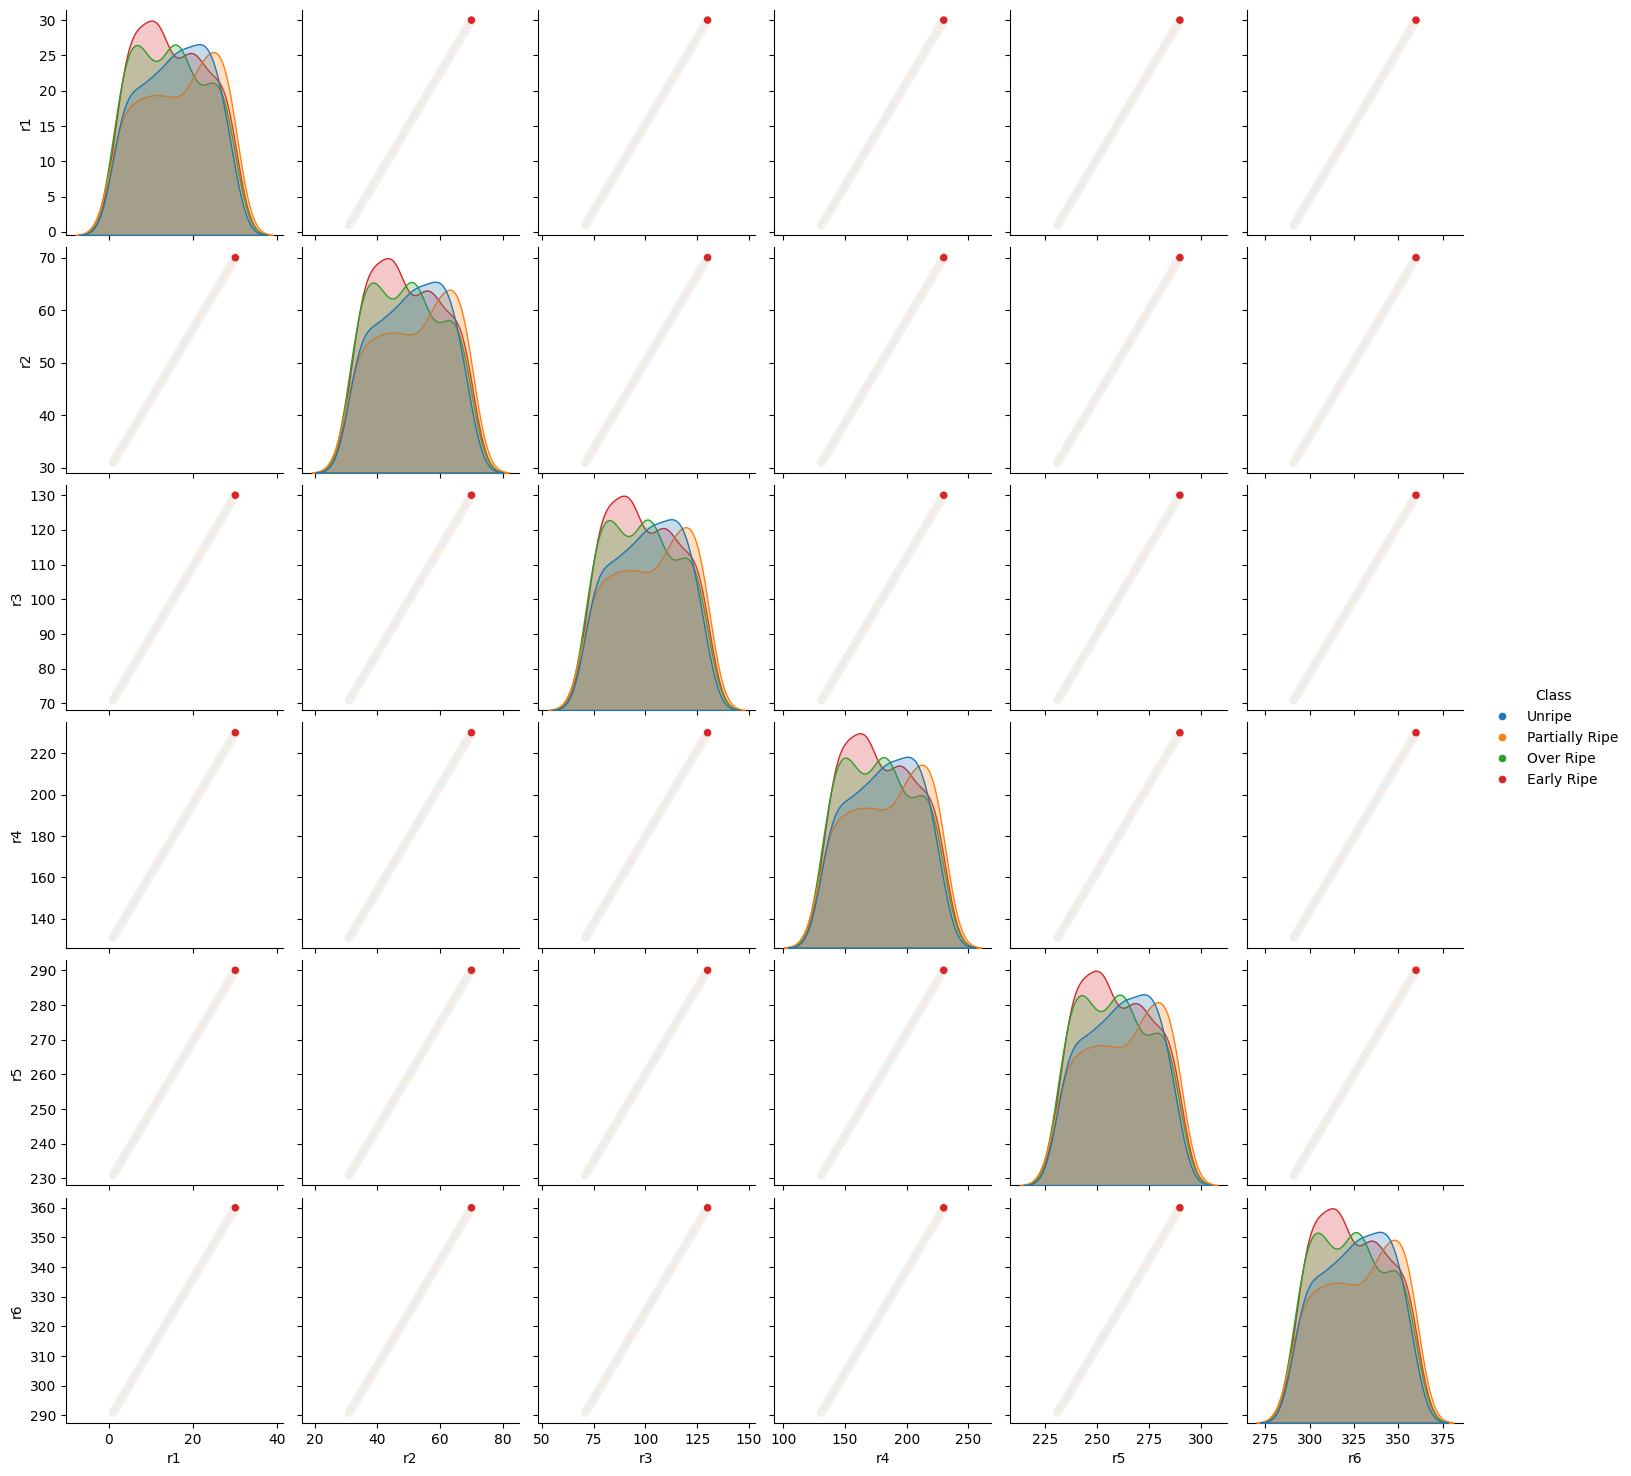

In [52]:
import seaborn as sns

sns.pairplot(raw_data,hue='Class')

From the above grapgh we understand the overlapping of the feature regions. The reason behind the diagonal view is because the features are specified to various different ranges.

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,raw_data['Class'],
                                                    test_size=0.30)

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


##Finding suitable value for n_neighbours

In [56]:
accuracy_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,raw_data['Class'],cv=10)
    accuracy_rate.append(score.mean())

In [57]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,raw_data['Class'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

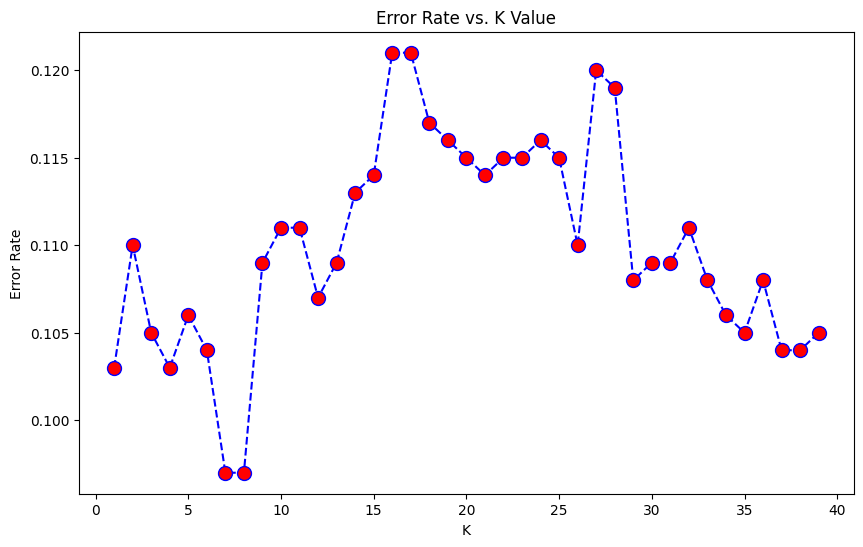

In [58]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

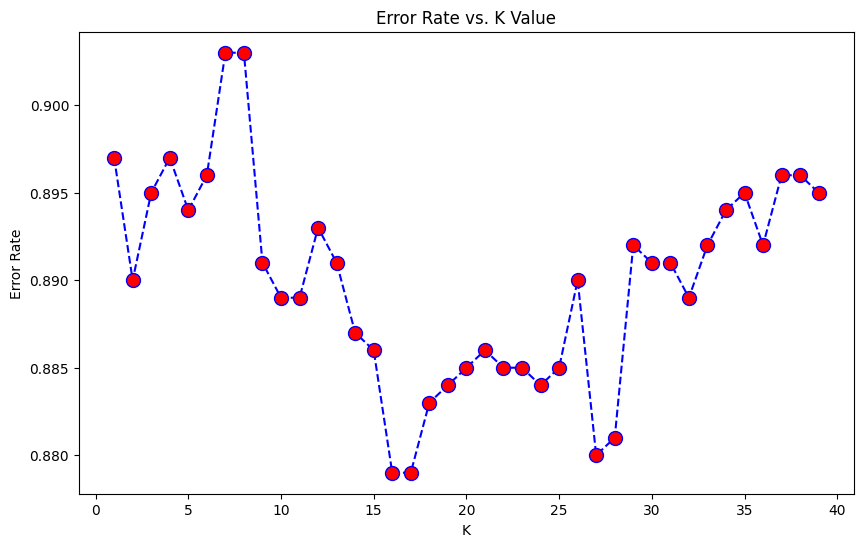

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
# plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>27 the error rate just tends to hover around 0.150-0.140

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[20 18 21 15]
 [21 19 14 24]
 [18 23  9 19]
 [23 22 15 19]]


                precision    recall  f1-score   support

    Early Ripe       0.24      0.27      0.26        74
     Over Ripe       0.23      0.24      0.24        78
Partially Ripe       0.15      0.13      0.14        69
        Unripe       0.25      0.24      0.24        79

      accuracy                           0.22       300
     macro avg       0.22      0.22      0.22       300
  weighted avg       0.22      0.22      0.22       300



In [61]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[37 15 16  6]
 [27 16 18 17]
 [34 12 11 12]
 [30 20 16 13]]


                precision    recall  f1-score   support

    Early Ripe       0.29      0.50      0.37        74
     Over Ripe       0.25      0.21      0.23        78
Partially Ripe       0.18      0.16      0.17        69
        Unripe       0.27      0.16      0.20        79

      accuracy                           0.26       300
     macro avg       0.25      0.26      0.24       300
  weighted avg       0.25      0.26      0.24       300



In [62]:
knn = KNeighborsClassifier()

test_sizes = np.arange(1, 100)
precisions = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, raw_data['Class'],
                                                    test_size=test_size)

    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)

    precision = accuracy_score(y_test, pred)
    precisions.append(precision)

print("Precision for each test size:")
pre=pd.DataFrame()
pre['precisions']= precisions
print(max(pre))
# print(max(precisions))

Precision for each test size:
precisions


In [63]:
# display(pre.stack(pre['precisions']==max(pre['precisions'])))
display(pre[pre['precisions']==max(pre['precisions'])].stack())

0  precisions    1.0
dtype: float64

In [64]:
max_precision_row = pre[pre['precisions'] == pre['precisions'].max()]
print(max_precision_row)

   precisions
0         1.0


In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 40)}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best value for n_neighbors
grid = GridSearchCV(knn, param_grid, scoring='precision_macro', cv=5)
grid.fit(X_train, y_train)

# Get the best value for n_neighbors
best_n_neighbors = grid.best_params_['n_neighbors']

print(f'The value for n_neighbors that maximizes precision is: {best_n_neighbors}')

# Create and fit the KNN classifier with the best n_neighbors
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

# Predict and evaluate as before
pred = knn.predict(X_test)

print(f'WITH K={best_n_neighbors}')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


The value for n_neighbors that maximizes precision is: 28
WITH K=28


[[ 8 13  6  5]
 [ 8  4  3  2]
 [ 7  9  3  5]
 [ 6 10  4  6]]


                precision    recall  f1-score   support

    Early Ripe       0.28      0.25      0.26        32
     Over Ripe       0.11      0.24      0.15        17
Partially Ripe       0.19      0.12      0.15        24
        Unripe       0.33      0.23      0.27        26

      accuracy                           0.21        99
     macro avg       0.23      0.21      0.21        99
  weighted avg       0.24      0.21      0.22        99

